<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Relevant-Libraries" data-toc-modified-id="Import-Relevant-Libraries-1">Import Relevant Libraries</a></span></li><li><span><a href="#Read-Flow-Data-File" data-toc-modified-id="Read-Flow-Data-File-2">Read Flow Data File</a></span></li><li><span><a href="#Read-Batch-Data-File" data-toc-modified-id="Read-Batch-Data-File-3">Read Batch Data File</a></span></li><li><span><a href="#Direct-RF-Prediction" data-toc-modified-id="Direct-RF-Prediction-4">Direct RF Prediction</a></span><ul class="toc-item"><li><span><a href="#Batch-Condition-28-Predicted-on-RF" data-toc-modified-id="Batch-Condition-28-Predicted-on-RF-4.1">Batch Condition 28 Predicted on RF</a></span></li><li><span><a href="#Batch-Condition-31-Predicted-on-RF" data-toc-modified-id="Batch-Condition-31-Predicted-on-RF-4.2">Batch Condition 31 Predicted on RF</a></span></li><li><span><a href="#Batch-Condition-35-Predicted-on-RF" data-toc-modified-id="Batch-Condition-35-Predicted-on-RF-4.3">Batch Condition 35 Predicted on RF</a></span></li></ul></li><li><span><a href="#Train-Test-Split-for-Fine-Tuning-of-DNN" data-toc-modified-id="Train-Test-Split-for-Fine-Tuning-of-DNN-5">Train-Test Split for Fine-Tuning of DNN</a></span></li><li><span><a href="#Load-Model-and-Assess-Pre-Training-Accuracy" data-toc-modified-id="Load-Model-and-Assess-Pre-Training-Accuracy-6">Load Model and Assess Pre-Training Accuracy</a></span><ul class="toc-item"><li><span><a href="#Batch-Condition-28-Predicted-on-Fine-Tuned-DNN" data-toc-modified-id="Batch-Condition-28-Predicted-on-Fine-Tuned-DNN-6.1">Batch Condition 28 Predicted on Fine-Tuned DNN</a></span></li><li><span><a href="#Batch-Condition-31-Predicted-on-Fine-Tuned-DNN" data-toc-modified-id="Batch-Condition-31-Predicted-on-Fine-Tuned-DNN-6.2">Batch Condition 31 Predicted on Fine-Tuned DNN</a></span></li><li><span><a href="#Batch-Condition-35-Predicted-on-Fine-Tuned-DNN" data-toc-modified-id="Batch-Condition-35-Predicted-on-Fine-Tuned-DNN-6.3">Batch Condition 35 Predicted on Fine-Tuned DNN</a></span></li></ul></li><li><span><a href="#Import-DNN-Model-and-Test-Predictions-Without-Fine-Tuning" data-toc-modified-id="Import-DNN-Model-and-Test-Predictions-Without-Fine-Tuning-7">Import DNN Model and Test Predictions Without Fine-Tuning</a></span><ul class="toc-item"><li><span><a href="#Batch-Condition-28-Predicted-on-Vanilla-DNN" data-toc-modified-id="Batch-Condition-28-Predicted-on-Vanilla-DNN-7.1">Batch Condition 28 Predicted on Vanilla DNN</a></span></li><li><span><a href="#Batch-Condition-31-Predicted-on-Vanilla-DNN" data-toc-modified-id="Batch-Condition-31-Predicted-on-Vanilla-DNN-7.2">Batch Condition 31 Predicted on Vanilla DNN</a></span></li><li><span><a href="#Batch-Condition-35-Predicted-on-Vanilla-DNN" data-toc-modified-id="Batch-Condition-35-Predicted-on-Vanilla-DNN-7.3">Batch Condition 35 Predicted on Vanilla DNN</a></span></li></ul></li></ul></div>

## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import keras

print(f'Tensorflow Version: {tf.__version__}')
print(f'Keras Version: {tensorflow.keras.__version__}')
print()
print(f'Python {sys.version}')
print(f'Pandas {pd.__version__}')
print(f'Scikit-Learn {sk.__version__}')
#print('GPU is', 'available' if tf.test.is_gpu_available() else 'NOT AVAILABLE')

Tensorflow Version: 2.3.0
Keras Version: 2.4.0

Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Pandas 1.4.1
Scikit-Learn 1.0.2


In [3]:
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

## Read Flow Data File

In [4]:
df = pd.read_excel('Consolidated Data with MWD (Log, w_i) Values.xlsx')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Condition,Sty wt%,Sty:AIBN,Residence_Time,Conversion,5.507,5.5103,5.5075,5.5048,5.5021,...,2.7309,2.7296,2.7284,2.7271,2.7258,2.7246,2.7233,2.722,2.7208,2.7174
0,1,0.3,150,30,10.394182,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0029,0.0026,0.0026,0.0024,0.0023,0.0022,0.0022,0.0020,0.0021,0.0020
1,1,0.3,150,60,18.468858,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0070,0.0070,0.0070,0.0070,0.0070,0.0069,0.0069,0.0068,0.0068,0.0067
2,1,0.3,150,90,29.887858,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0065,0.0064,0.0063,0.0062,0.0061,0.0061,0.0061,0.0060,0.0061,0.0060
3,1,0.3,150,120,28.449042,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0070,0.0069,0.0068,0.0066,0.0066,0.0064,0.0064,0.0063,0.0063,0.0062
4,2,0.3,100,30,11.350463,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0080,0.0079,0.0078,0.0077,0.0078,0.0078,0.0076,0.0076,0.0076,0.0075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,26,0.5,250,120,30.682166,0.0002,0.0002,0.0002,0.0002,0.0002,...,0.0017,0.0019,0.0020,0.0019,0.0021,0.0020,0.0019,0.0019,0.0019,0.0018
104,27,0.5,200,30,16.965776,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0025,0.0025,0.0022,0.0022,0.0023,0.0022,0.0022,0.0023,0.0023,0.0024
105,27,0.5,200,60,25.224678,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0023,0.0023,0.0023,0.0024,0.0023,0.0023,0.0023,0.0024,0.0023,0.0023
106,27,0.5,200,90,28.791491,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0024,0.0024,0.0021,0.0021,0.0020,0.0020,0.0021,0.0022,0.0021,0.0023


In [5]:
# Remove Condition 15
df_ = df[df['Condition'] != 15]
df_ = df_.drop(['Condition'], axis=1)
X = df_.iloc[:,:3]
y = df_.iloc[:,4:]
y = y.div(y.sum(axis=1), axis=0) # Normalize all y values across each row to sum 1

In [6]:
# Train - Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X.columns)

y_train = pd.DataFrame(scaler_y.fit_transform(y_train), columns=y.columns)
y_test = pd.DataFrame(scaler_y.transform(y_test), columns=y.columns)

C:\Users\Tan Jin Da\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Tan Jin Da\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Tan Jin Da\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(


## Read Batch Data File

In [8]:
df_batch = pd.read_excel('22-06-08 MWD Data for C28, C31 and C35.xlsx')
df_batch.drop(columns=['Unnamed: 0'], inplace=True)
df_batch

,Condition,Sty wt%,Sty:AIBN,Residence_Time,5.507,5.5103,5.5075,5.5048,5.5021,5.4993,...,2.7309,2.7296,2.7284,2.7271,2.7258,2.7246,2.7233,2.722,2.7208,2.7174
0,28,0.6,150,30,1.666660e-06,1.666660e-06,1.666660e-06,1.666660e-06,1.666660e-06,1.666660e-06,...,0.000008,0.000008,0.000008,7.666640e-06,0.000008,0.000007,0.000007,6.999970e-06,6.666640e-06,6.666640e-06
1,28,0.6,150,60,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000002,0.000002,0.000002,2.000010e-06,0.000002,0.000002,0.000002,1.666670e-06,1.666670e-06,1.333340e-06
2,28,0.6,150,90,3.333350e-07,3.333350e-07,3.333350e-07,3.333350e-07,3.333350e-07,3.333350e-07,...,0.000001,0.000001,0.000001,6.666700e-07,0.000001,0.000001,0.000001,6.666700e-07,6.666700e-07,6.666700e-07
3,28,0.6,150,120,0.000000e+00,0.000000e+00,3.333310e-07,3.333310e-07,3.333310e-07,3.333310e-07,...,0.000003,0.000003,0.000003,2.666650e-06,0.000002,0.000002,0.000002,2.333320e-06,2.333320e-06,2.333320e-06
4,31,0.7,150,30,2.333330e-06,2.333330e-06,2.333330e-06,2.333330e-06,2.333330e-06,2.333330e-06,...,0.000004,0.000004,0.000003,3.333330e-06,0.000003,0.000003,0.000003,3.333330e-06,2.999990e-06,2.999990e-06
5,31,0.7,150,60,2.333330e-06,2.333330e-06,2.333330e-06,2.333330e-06,2.333330e-06,2.333330e-06,...,0.000004,0.000004,0.000004,3.666660e-06,0.000004,0.000004,0.000004,3.666660e-06,3.333330e-06,3.333330e-06
6,31,0.7,150,90,1.666650e-06,1.666650e-06,1.333320e-06,1.666650e-06,1.666650e-06,1.666650e-06,...,0.000003,0.000003,0.000003,2.666640e-06,0.000002,0.000002,0.000002,2.333310e-06,2.333310e-06,2.333310e-06
7,31,0.7,150,120,2.333320e-06,2.333320e-06,2.333320e-06,2.333320e-06,2.333320e-06,2.333320e-06,...,0.000003,0.000003,0.000003,3.333320e-06,0.000003,0.000003,0.000003,2.999990e-06,2.999990e-06,2.999990e-06
8,35,0.8,100,30,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000005,0.000005,0.000005,4.999983e-06,0.000005,0.000005,0.000005,4.666651e-06,4.666651e-06,4.333319e-06
9,35,0.8,100,60,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000005,0.000005,0.000005,4.666673e-06,0.000005,0.000004,0.000004,4.333339e-06,4.333339e-06,4.000005e-06


In [9]:
batch_c28 = df_batch.iloc[:4,4:]

batch_c31 = df_batch.iloc[4:8,4:]

batch_c35 = df_batch.iloc[8:,4:]

In [10]:
X_batch = df_batch.iloc[:, 1:4]
y_batch = df_batch.iloc[:, 4:]

In [11]:
X_batch = pd.DataFrame(scaler_X.transform(X_batch), columns=X.columns)
y_batch = pd.DataFrame(scaler_y.transform(y_batch), columns=y.columns)

C:\Users\Tan Jin Da\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(


## Direct RF Prediction

In [12]:
from joblib import dump, load

rf_regressor = load('22-01-24_rf_regressor.joblib')

C:\Users\Tan Jin Da\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Tan Jin Da\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Tan Jin Da\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 0.23.2 when using version 1.0.2. This might lead to b

In [13]:
d = {'Sty wt%': [0.6, 0.6, 0.6, 0.6],
    'Sty:AIBN' : [150, 150, 150, 150],
    'Residence_Time' : [30, 60, 90, 120]}

c28 = scaler_X.transform(pd.DataFrame(d))

y_pred = rf_regressor.predict(c28) ## RF Predictions on Condition 28
y_pred_c28 = pd.DataFrame(scaler_y.inverse_transform(y_pred))

y_pred_c28 = y_pred_c28.div(y_pred_c28.sum(axis=1), axis=0)

In [14]:
d = {'Sty wt%': [0.7, 0.7, 0.7, 0.7],
    'Sty:AIBN' : [150, 150, 150, 150],
    'Residence_Time' : [30, 60, 90, 120]}

c31 = scaler_X.transform(pd.DataFrame(d))

y_pred = rf_regressor.predict(c31) ## RF Predictions on Condition 31
y_pred_c31 = pd.DataFrame(scaler_y.inverse_transform(y_pred))

y_pred_c31 = y_pred_c31.div(y_pred_c31.sum(axis=1), axis=0)

In [15]:
d = {'Sty wt%': [0.8, 0.8, 0.8, 0.8],
    'Sty:AIBN' : [100, 100, 100, 100],
    'Residence_Time' : [30, 60, 90, 120]}

c35 = scaler_X.transform(pd.DataFrame(d))

y_pred = rf_regressor.predict(c35) ## RF Predictions on Condition 35
y_pred_c35 = pd.DataFrame(scaler_y.inverse_transform(y_pred))

y_pred_c35 = y_pred_c35.div(y_pred_c35.sum(axis=1), axis=0)

### Batch Condition 28 Predicted on RF

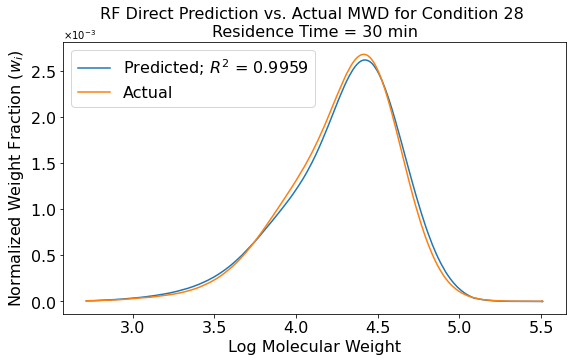

In [16]:
from sklearn.metrics import r2_score

x = batch_c28.columns
y_c28t30_pred = y_pred_c28.iloc[0,:]
y_c28t30_expt = batch_c28.iloc[0,:]

r2 = r2_score(y_c28t30_expt, y_c28t30_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 28 \nResidence Time = 30 min', size=16)
plt.plot(x,y_c28t30_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t30_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

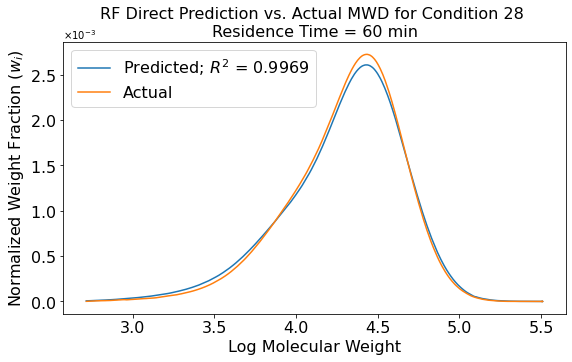

In [17]:
from sklearn.metrics import r2_score

x = batch_c28.columns
y_c28t60_pred = y_pred_c28.iloc[1,:]
y_c28t60_expt = batch_c28.iloc[1,:]

r2 = r2_score(y_c28t60_expt, y_c28t60_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 28 \nResidence Time = 60 min', size=16)
plt.plot(x,y_c28t60_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t60_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

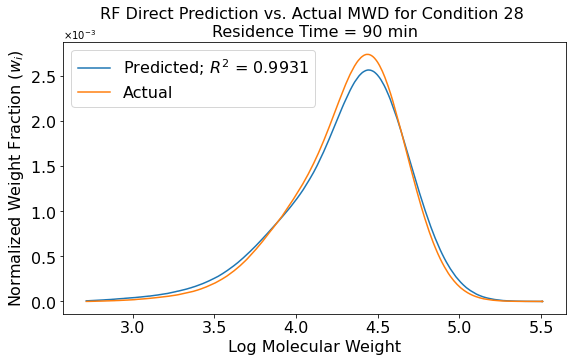

In [18]:
from sklearn.metrics import r2_score

x = batch_c28.columns
y_c28t90_pred = y_pred_c28.iloc[2,:]
y_c28t90_expt = batch_c28.iloc[2,:]

r2 = r2_score(y_c28t90_expt, y_c28t90_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 28 \nResidence Time = 90 min', size=16)
plt.plot(x,y_c28t90_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t90_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

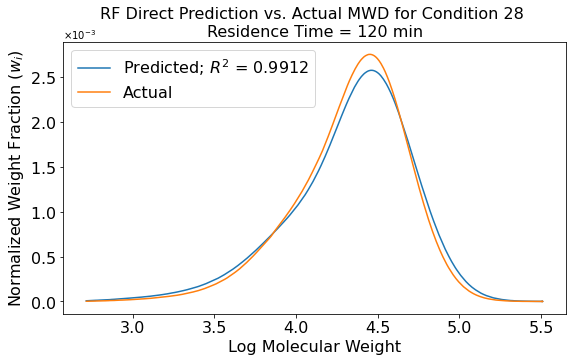

In [19]:
from sklearn.metrics import r2_score

x = batch_c28.columns
y_c28t120_pred = y_pred_c28.iloc[3,:]
y_c28t120_expt = batch_c28.iloc[3,:]

r2 = r2_score(y_c28t120_expt, y_c28t120_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 28 \nResidence Time = 120 min', size=16)
plt.plot(x,y_c28t120_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t120_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

### Batch Condition 31 Predicted on RF

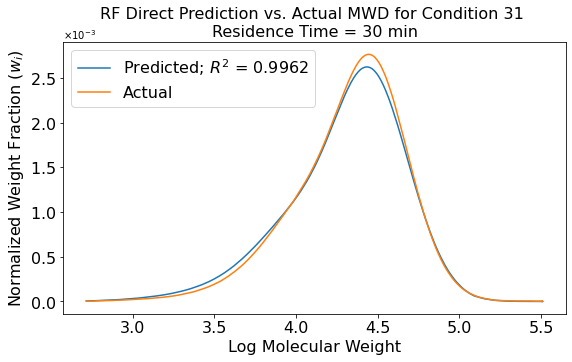

In [20]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t30_pred = y_pred_c31.iloc[0,:]
y_c31t30_expt = batch_c31.iloc[0,:]

r2 = r2_score(y_c31t30_expt, y_c31t30_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 31 \nResidence Time = 30 min', size=16)
plt.plot(x,y_c31t30_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t30_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

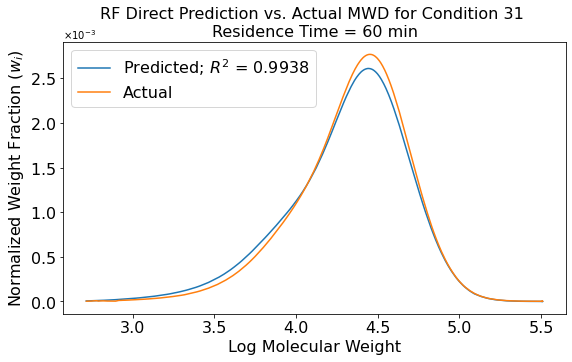

In [21]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t60_pred = y_pred_c31.iloc[1,:]
y_c31t60_expt = batch_c31.iloc[1,:]

r2 = r2_score(y_c31t60_expt, y_c31t60_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 31 \nResidence Time = 60 min', size=16)
plt.plot(x,y_c31t60_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t60_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

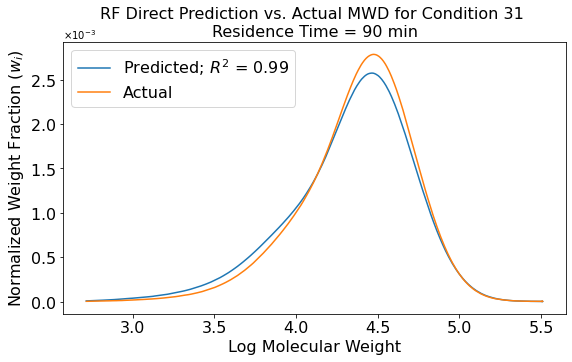

In [22]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t90_pred = y_pred_c31.iloc[2,:]
y_c31t90_expt = batch_c31.iloc[2,:]

r2 = r2_score(y_c31t90_expt, y_c31t90_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 31 \nResidence Time = 90 min', size=16)
plt.plot(x,y_c31t90_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t90_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

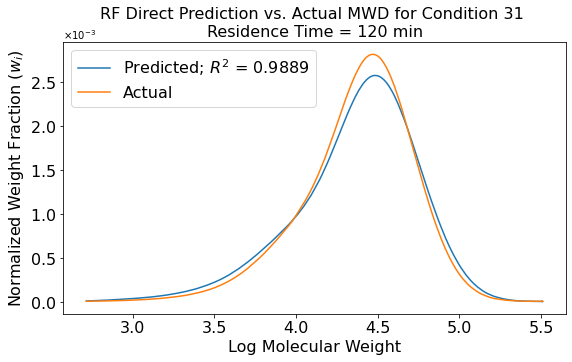

In [23]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t120_pred = y_pred_c31.iloc[3,:]
y_c31t120_expt = batch_c31.iloc[3,:]

r2 = r2_score(y_c31t120_expt, y_c31t120_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 31 \nResidence Time = 120 min', size=16)
plt.plot(x,y_c31t120_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t120_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

### Batch Condition 35 Predicted on RF

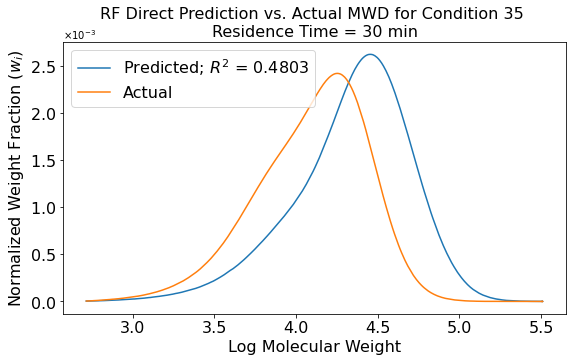

In [24]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t30_pred = y_pred_c35.iloc[0,:]
y_c35t30_expt = batch_c35.iloc[0,:]

r2 = r2_score(y_c35t30_expt, y_c35t30_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 35 \nResidence Time = 30 min', size=16)
plt.plot(x,y_c35t30_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t30_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

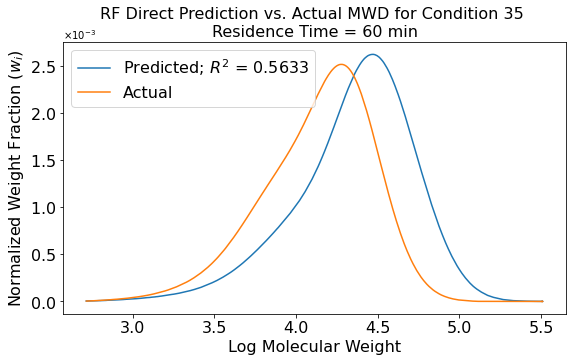

In [25]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t60_pred = y_pred_c35.iloc[1,:]
y_c35t60_expt = batch_c35.iloc[1,:]

r2 = r2_score(y_c35t60_expt, y_c35t60_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 35 \nResidence Time = 60 min', size=16)
plt.plot(x,y_c35t60_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t60_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

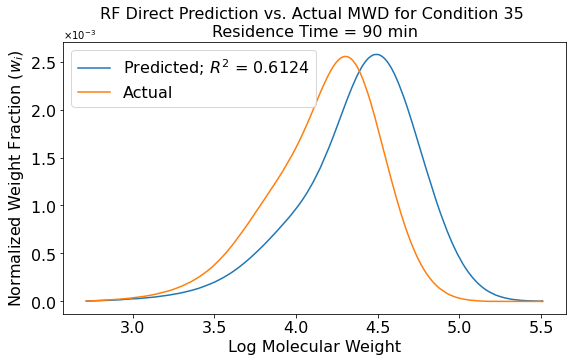

In [26]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t90_pred = y_pred_c35.iloc[2,:]
y_c35t90_expt = batch_c35.iloc[2,:]

r2 = r2_score(y_c35t90_expt, y_c35t90_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 35 \nResidence Time = 90 min', size=16)
plt.plot(x,y_c35t90_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t90_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

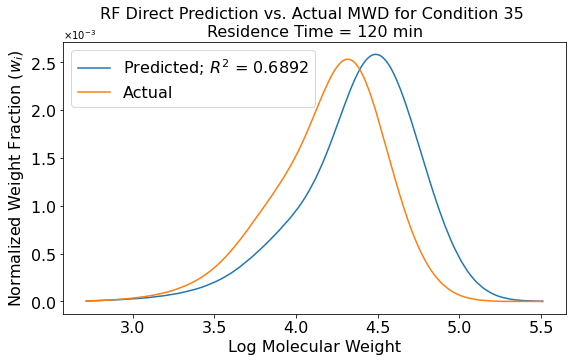

In [27]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t120_pred = y_pred_c35.iloc[3,:]
y_c35t120_expt = batch_c35.iloc[3,:]

r2 = r2_score(y_c35t120_expt, y_c35t120_pred)

plt.figure(figsize=(9,5))
plt.title('RF Direct Prediction vs. Actual MWD for Condition 35 \nResidence Time = 120 min', size=16)
plt.plot(x,y_c35t120_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t120_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

## Train-Test Split for Fine-Tuning of DNN

In [28]:
X_batch_train, X_batch_test, y_batch_train, y_batch_test = train_test_split(X_batch,
                                                                            y_batch,
                                                                            train_size= 0.3,
                                                                            stratify = df_batch['Condition'],
                                                                            random_state = 0)

In [29]:
X_batch_train

,Sty wt%,Sty:AIBN,Residence_Time
4,0.8,0.4,0.000000
2,0.6,0.4,0.666667
11,1.0,0.2,1.000000


## Load Model and Assess Pre-Training Accuracy

In [30]:
# Load and inspect DNN model

model = keras.models.load_model('DNN_MWD_Batch.hdf5') # Load Model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1100)              4400      
_________________________________________________________________
dense_4 (Dense)              (None, 1100)              1211100   
_________________________________________________________________
dense_5 (Dense)              (None, 1499)              1650399   
Total params: 2,865,899
Trainable params: 2,865,899
Non-trainable params: 0
_________________________________________________________________


In [31]:
for layer in model.layers[:-1]:
    layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1100)              4400      
_________________________________________________________________
dense_4 (Dense)              (None, 1100)              1211100   
_________________________________________________________________
dense_5 (Dense)              (None, 1499)              1650399   
Total params: 2,865,899
Trainable params: 1,650,399
Non-trainable params: 1,215,500
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss="huber")

history = model.fit(X_batch_train, y_batch_train,
          epochs = 150,
          validation_data = (X_batch_test, y_batch_test),
          verbose=1, batch_size=X_batch_train.shape[0])

metrics_data = pd.DataFrame(history.history)

Epoch 1/150
1/1 [==============================] - 0s 124ms/step - loss: 0.0152 - val_loss: 0.0213
Epoch 2/150
1/1 [==============================] - 0s 14ms/step - loss: 0.0117 - val_loss: 0.0192
Epoch 3/150
1/1 [==============================] - 0s 17ms/step - loss: 0.0103 - val_loss: 0.0183
Epoch 4/150
1/1 [==============================] - 0s 15ms/step - loss: 0.0099 - val_loss: 0.0178
Epoch 5/150
1/1 [==============================] - 0s 15ms/step - loss: 0.0097 - val_loss: 0.0173
Epoch 6/150
1/1 [==============================] - 0s 17ms/step - loss: 0.0091 - val_loss: 0.0167
Epoch 7/150
1/1 [==============================] - 0s 17ms/step - loss: 0.0083 - val_loss: 0.0160
Epoch 8/150
1/1 [==============================] - 0s 19ms/step - loss: 0.0073 - val_loss: 0.0155
Epoch 9/150
1/1 [==============================] - 0s 17ms/step - loss: 0.0064 - val_loss: 0.0151
Epoch 10/150
1/1 [==============================] - 0s 17ms/step - loss: 0.0057 - val_loss: 0.0148
Epoch 11/150
1/1 [

1/1 [==============================] - 0s 14ms/step - loss: 1.7706e-06 - val_loss: 0.0071
Epoch 82/150
1/1 [==============================] - 0s 15ms/step - loss: 1.6476e-06 - val_loss: 0.0071
Epoch 83/150
1/1 [==============================] - 0s 14ms/step - loss: 1.5572e-06 - val_loss: 0.0071
Epoch 84/150
1/1 [==============================] - 0s 12ms/step - loss: 1.4844e-06 - val_loss: 0.0071
Epoch 85/150
1/1 [==============================] - 0s 14ms/step - loss: 1.4124e-06 - val_loss: 0.0071
Epoch 86/150
1/1 [==============================] - 0s 14ms/step - loss: 1.3338e-06 - val_loss: 0.0071
Epoch 87/150
1/1 [==============================] - 0s 15ms/step - loss: 1.2569e-06 - val_loss: 0.0071
Epoch 88/150
1/1 [==============================] - 0s 13ms/step - loss: 1.1921e-06 - val_loss: 0.0071
Epoch 89/150
1/1 [==============================] - 0s 15ms/step - loss: 1.1383e-06 - val_loss: 0.0071
Epoch 90/150
1/1 [==============================] - 0s 18ms/step - loss: 1.0871e-06 - 

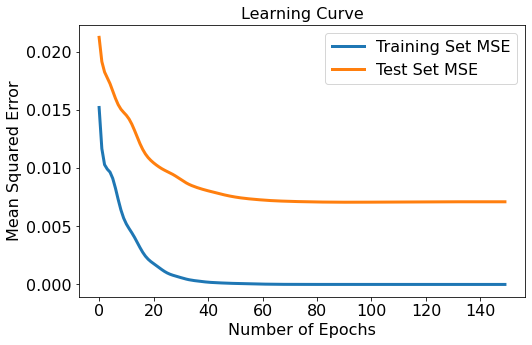

In [33]:
plt.figure(figsize=(8,5))
plt.plot(metrics_data['loss'], label = 'Training Set MSE', linewidth = 3)
plt.plot(metrics_data['val_loss'], label = 'Test Set MSE', linewidth = 3)
plt.title('Learning Curve', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Mean Squared Error', fontsize = 16)
plt.xlabel('Number of Epochs', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

In [34]:
d = {'Sty wt%': [0.6, 0.6, 0.6, 0.6],
    'Sty:AIBN' : [150, 150, 150, 150],
    'Residence_Time' : [30, 60, 90, 120]}

c28 = scaler_X.transform(pd.DataFrame(d))

y_pred = model.predict(c28) ## DNN Predictions on Condition 28
y_pred_c28 = pd.DataFrame(scaler_y.inverse_transform(y_pred))

y_pred_c28 = pd.DataFrame(savgol_filter(x = y_pred_c28,
                         window_length = 101,
                         polyorder = 3))

y_pred_c28 = y_pred_c28.div(y_pred_c28.sum(axis=1), axis=0)

In [35]:
d = {'Sty wt%': [0.7, 0.7, 0.7, 0.7],
    'Sty:AIBN' : [150, 150, 150, 150],
    'Residence_Time' : [30, 60, 90, 120]}

c31 = scaler_X.transform(pd.DataFrame(d))

y_pred = model.predict(c31) ## DNN Predictions on Condition 31
y_pred_c31 = pd.DataFrame(scaler_y.inverse_transform(y_pred))

y_pred_c31 = pd.DataFrame(savgol_filter(x = y_pred_c31,
                         window_length = 101,
                         polyorder = 3))

y_pred_c31 = y_pred_c31.div(y_pred_c31.sum(axis=1), axis=0)

In [36]:
d = {'Sty wt%': [0.8, 0.8, 0.8, 0.8],
    'Sty:AIBN' : [100, 100, 100, 100],
    'Residence_Time' : [30, 60, 90, 120]}

c35 = scaler_X.transform(pd.DataFrame(d))

y_pred = model.predict(c35) ## DNN Predictions on Condition 35
y_pred_c35 = pd.DataFrame(scaler_y.inverse_transform(y_pred))

y_pred_c35 = pd.DataFrame(savgol_filter(x = y_pred_c35,
                         window_length = 101,
                         polyorder = 3))

y_pred_c35 = y_pred_c35.div(y_pred_c35.sum(axis=1), axis=0)

### Batch Condition 28 Predicted on Fine-Tuned DNN

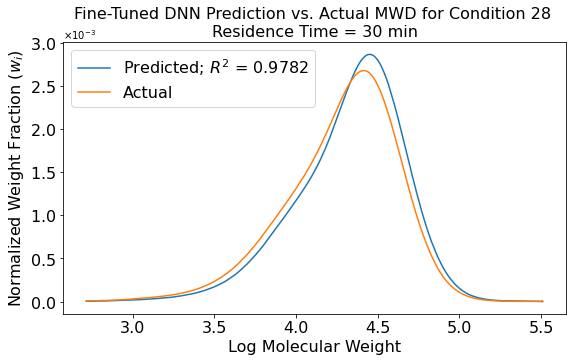

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = batch_c28.columns
y_c28t30_pred = y_pred_c28.iloc[0,:]
y_c28t30_expt = batch_c28.iloc[0,:]

r2 = r2_score(y_c28t30_expt, y_c28t30_pred)
rmse = mean_squared_error(y_c28t30_expt, y_c28t30_pred, squared=False)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 28 \nResidence Time = 30 min', size=16)
plt.plot(x,y_c28t30_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t30_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

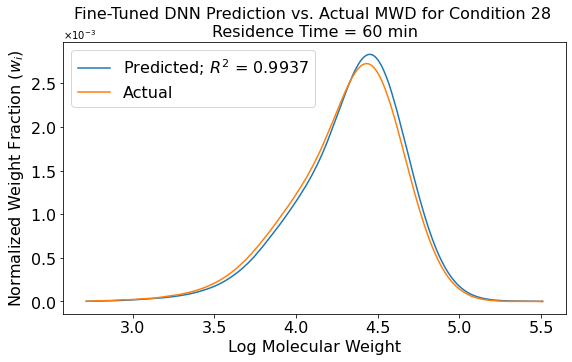

In [38]:
from sklearn.metrics import r2_score

x = batch_c28.columns
y_c28t60_pred = y_pred_c28.iloc[1,:]
y_c28t60_expt = batch_c28.iloc[1,:]

r2 = r2_score(y_c28t60_expt, y_c28t60_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 28 \nResidence Time = 60 min', size=16)
plt.plot(x,y_c28t60_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t60_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

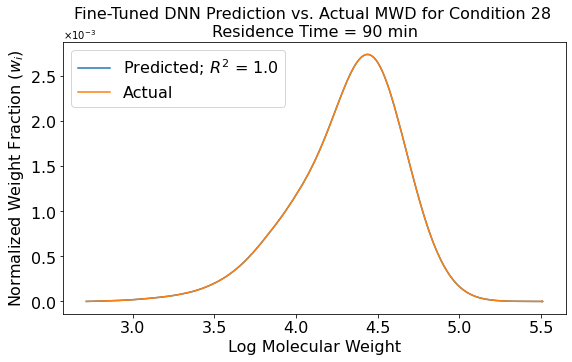

In [39]:
from sklearn.metrics import r2_score

x = batch_c28.columns
y_c28t90_pred = y_pred_c28.iloc[2,:]
y_c28t90_expt = batch_c28.iloc[2,:]

r2 = r2_score(y_c28t90_expt, y_c28t90_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 28 \nResidence Time = 90 min', size=16)
plt.plot(x,y_c28t90_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t90_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

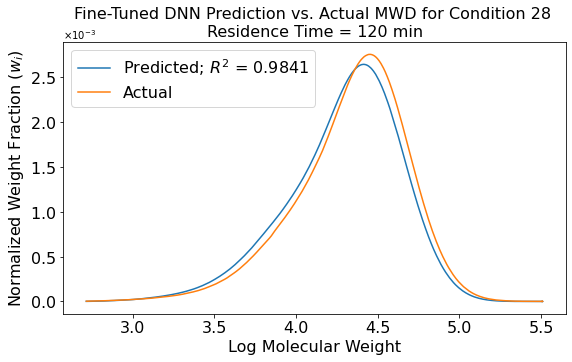

In [40]:
from sklearn.metrics import r2_score

x = batch_c28.columns
y_c28t120_pred = y_pred_c28.iloc[3,:]
y_c28t120_expt = batch_c28.iloc[3,:]

r2 = r2_score(y_c28t120_expt, y_c28t120_pred)
rmse = mean_squared_error(y_c28t120_expt, y_c28t120_pred, squared=False)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 28 \nResidence Time = 120 min', size=16)
plt.plot(x,y_c28t120_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t120_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

### Batch Condition 31 Predicted on Fine-Tuned DNN

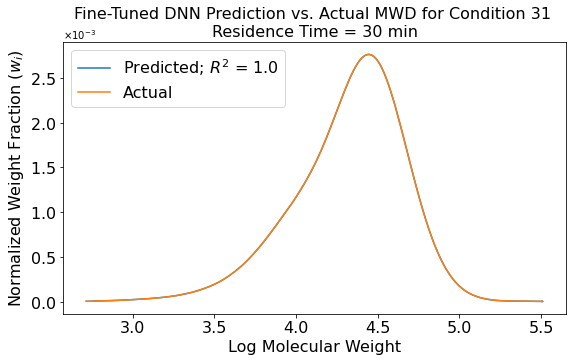

In [41]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t30_pred = y_pred_c31.iloc[0,:]
y_c31t30_expt = batch_c31.iloc[0,:]

r2 = r2_score(y_c31t30_expt, y_c31t30_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 31 \nResidence Time = 30 min', size=16)
plt.plot(x,y_c31t30_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t30_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

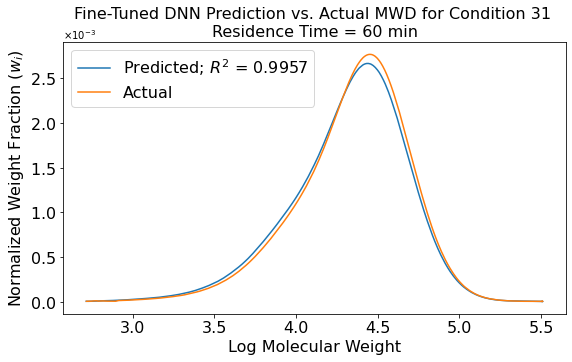

In [42]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t60_pred = y_pred_c31.iloc[1,:]
y_c31t60_expt = batch_c31.iloc[1,:]

r2 = r2_score(y_c31t60_expt, y_c31t60_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 31 \nResidence Time = 60 min', size=16)
plt.plot(x,y_c31t60_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t60_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

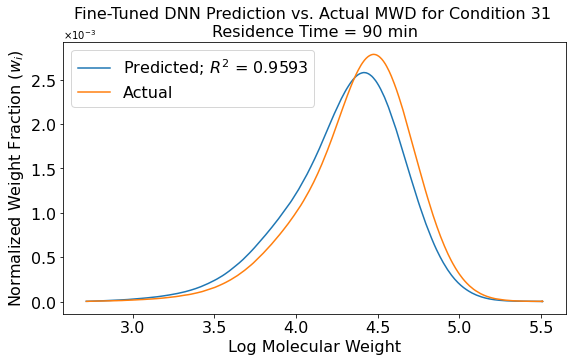

In [43]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t90_pred = y_pred_c31.iloc[2,:]
y_c31t90_expt = batch_c31.iloc[2,:]

r2 = r2_score(y_c31t90_expt, y_c31t90_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 31 \nResidence Time = 90 min', size=16)
plt.plot(x,y_c31t90_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t90_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

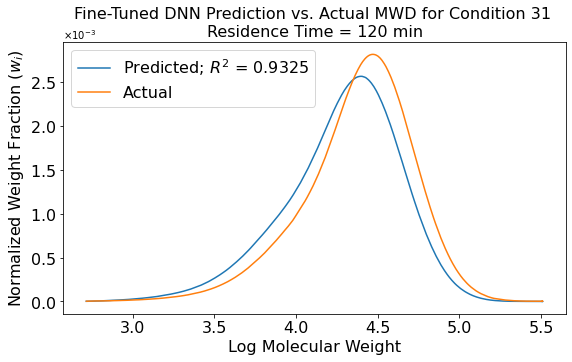

In [44]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t120_pred = y_pred_c31.iloc[3,:]
y_c31t120_expt = batch_c31.iloc[3,:]

r2 = r2_score(y_c31t120_expt, y_c31t120_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 31 \nResidence Time = 120 min', size=16)
plt.plot(x,y_c31t120_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t120_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

### Batch Condition 35 Predicted on Fine-Tuned DNN

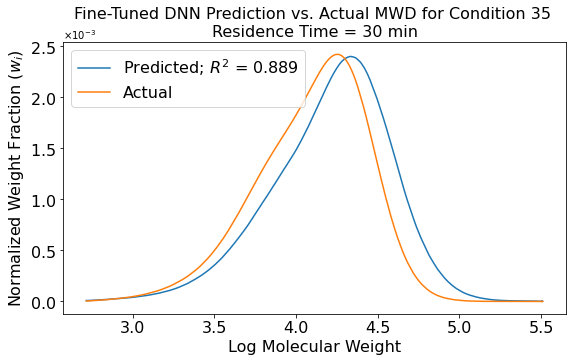

In [45]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t30_pred = y_pred_c35.iloc[0,:]
y_c35t30_expt = batch_c35.iloc[0,:]

r2 = r2_score(y_c35t30_expt, y_c35t30_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 35 \nResidence Time = 30 min', size=16)
plt.plot(x,y_c35t30_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t30_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

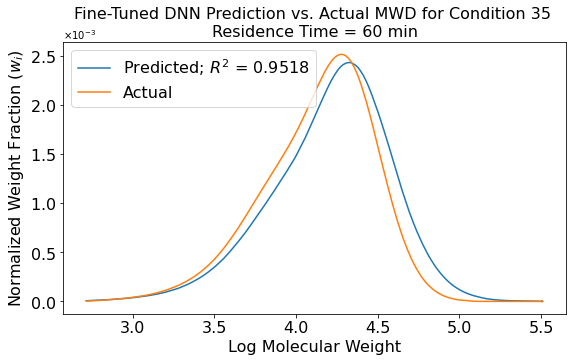

In [46]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t60_pred = y_pred_c35.iloc[1,:]
y_c35t60_expt = batch_c35.iloc[1,:]

r2 = r2_score(y_c35t60_expt, y_c35t60_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 35 \nResidence Time = 60 min', size=16)
plt.plot(x,y_c35t60_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t60_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

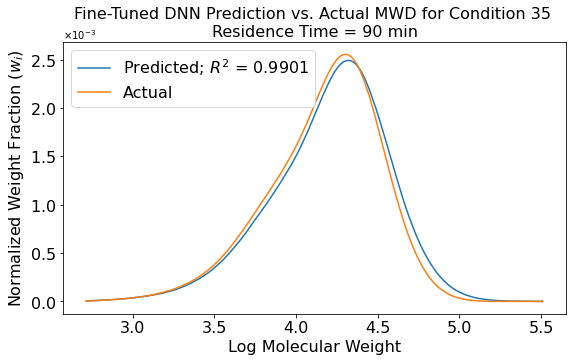

In [47]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t90_pred = y_pred_c35.iloc[2,:]
y_c35t90_expt = batch_c35.iloc[2,:]

r2 = r2_score(y_c35t90_expt, y_c35t90_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 35 \nResidence Time = 90 min', size=16)
plt.plot(x,y_c35t90_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t90_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

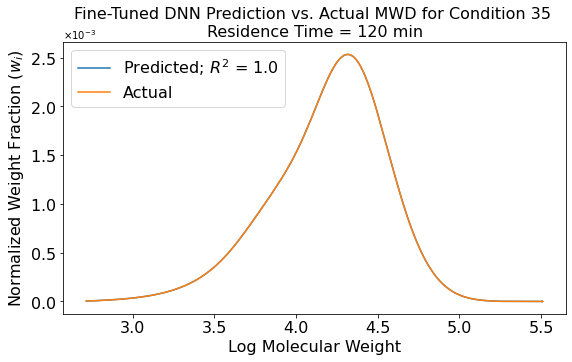

In [48]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t120_pred = y_pred_c35.iloc[3,:]
y_c35t120_expt = batch_c35.iloc[3,:]

r2 = r2_score(y_c35t120_expt, y_c35t120_pred)

plt.figure(figsize=(9,5))
plt.title('Fine-Tuned DNN Prediction vs. Actual MWD for Condition 35 \nResidence Time = 120 min', size=16)
plt.plot(x,y_c35t120_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t120_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

## Import DNN Model and Test Predictions Without Fine-Tuning

In [49]:
# Load and inspect DNN model

model_vanilla = keras.models.load_model('DNN_MWD_Batch.hdf5') # Load Model

model_vanilla.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1100)              4400      
_________________________________________________________________
dense_4 (Dense)              (None, 1100)              1211100   
_________________________________________________________________
dense_5 (Dense)              (None, 1499)              1650399   
Total params: 2,865,899
Trainable params: 2,865,899
Non-trainable params: 0
_________________________________________________________________


In [50]:
d = {'Sty wt%': [0.6, 0.6, 0.6, 0.6],
    'Sty:AIBN' : [150, 150, 150, 150],
    'Residence_Time' : [30, 60, 90, 120]}

c28 = scaler_X.transform(pd.DataFrame(d))

y_pred = model_vanilla.predict(c28) ## DNN Predictions on Condition 28
y_pred_c28 = pd.DataFrame(scaler_y.inverse_transform(y_pred))

y_pred_c28 = pd.DataFrame(savgol_filter(x = y_pred_c28,
                         window_length = 101,
                         polyorder = 3))

y_pred_c28 = y_pred_c28.div(y_pred_c28.sum(axis=1), axis=0)

In [51]:
d = {'Sty wt%': [0.7, 0.7, 0.7, 0.7],
    'Sty:AIBN' : [150, 150, 150, 150],
    'Residence_Time' : [30, 60, 90, 120]}

c31 = scaler_X.transform(pd.DataFrame(d))

y_pred = model_vanilla.predict(c31) ## DNN Predictions on Condition 31
y_pred_c31 = pd.DataFrame(scaler_y.inverse_transform(y_pred))

y_pred_c31 = pd.DataFrame(savgol_filter(x = y_pred_c31,
                         window_length = 101,
                         polyorder = 3))

y_pred_c31 = y_pred_c31.div(y_pred_c31.sum(axis=1), axis=0)

In [52]:
d = {'Sty wt%': [0.8, 0.8, 0.8, 0.8],
    'Sty:AIBN' : [100, 100, 100, 100],
    'Residence_Time' : [30, 60, 90, 120]}

c35 = scaler_X.transform(pd.DataFrame(d))

y_pred = model_vanilla.predict(c35) ## DNN Predictions on Condition 35
y_pred_c35 = pd.DataFrame(scaler_y.inverse_transform(y_pred))

y_pred_c35 = pd.DataFrame(savgol_filter(x = y_pred_c35,
                         window_length = 101,
                         polyorder = 3))

y_pred_c35 = y_pred_c35.div(y_pred_c35.sum(axis=1), axis=0)

### Batch Condition 28 Predicted on Vanilla DNN

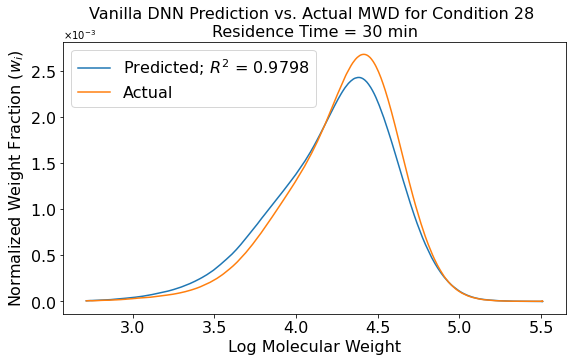

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = batch_c28.columns
y_c28t30_pred = y_pred_c28.iloc[0,:]
y_c28t30_expt = batch_c28.iloc[0,:]

r2 = r2_score(y_c28t30_expt, y_c28t30_pred)
rmse = mean_squared_error(y_c28t30_expt, y_c28t30_pred, squared=False)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 28 \nResidence Time = 30 min', size=16)
plt.plot(x,y_c28t30_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t30_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

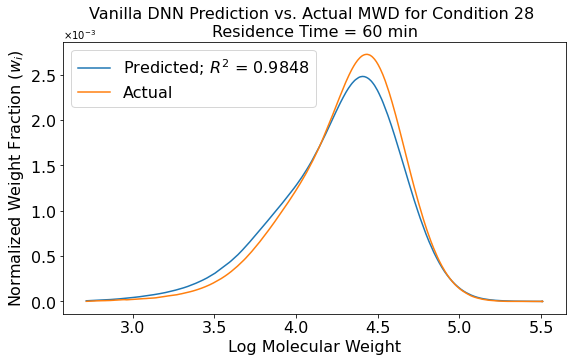

In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = batch_c28.columns
y_c28t60_pred = y_pred_c28.iloc[1,:]
y_c28t60_expt = batch_c28.iloc[1,:]

r2 = r2_score(y_c28t60_expt, y_c28t60_pred)
rmse = mean_squared_error(y_c28t60_expt, y_c28t60_pred, squared=False)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 28 \nResidence Time = 60 min', size=16)
plt.plot(x,y_c28t60_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t60_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

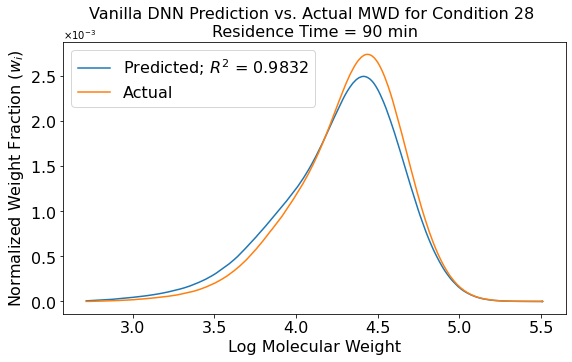

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = batch_c28.columns
y_c28t90_pred = y_pred_c28.iloc[2,:]
y_c28t90_expt = batch_c28.iloc[2,:]

r2 = r2_score(y_c28t90_expt, y_c28t90_pred)
rmse = mean_squared_error(y_c28t90_expt, y_c28t90_pred, squared=False)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 28 \nResidence Time = 90 min', size=16)
plt.plot(x,y_c28t90_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t90_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

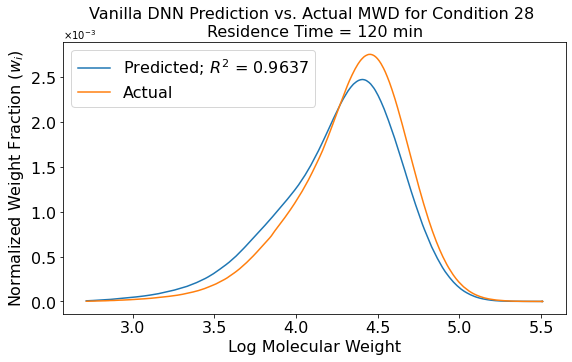

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = batch_c28.columns
y_c28t120_pred = y_pred_c28.iloc[3,:]
y_c28t120_expt = batch_c28.iloc[3,:]

r2 = r2_score(y_c28t120_expt, y_c28t120_pred)
rmse = mean_squared_error(y_c28t120_expt, y_c28t120_pred, squared=False)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 28 \nResidence Time = 120 min', size=16)
plt.plot(x,y_c28t120_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c28t120_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

### Batch Condition 31 Predicted on Vanilla DNN

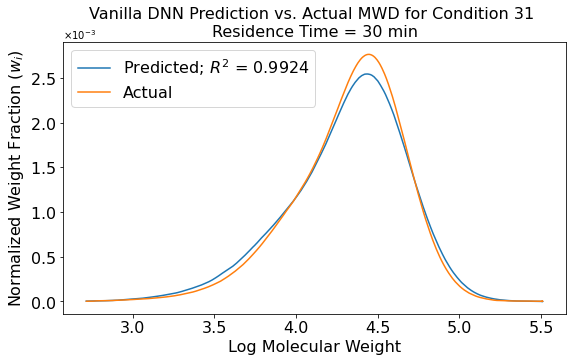

In [59]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t30_pred = y_pred_c31.iloc[0,:]
y_c31t30_expt = batch_c31.iloc[0,:]

r2 = r2_score(y_c31t30_expt, y_c31t30_pred)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 31 \nResidence Time = 30 min', size=16)
plt.plot(x,y_c31t30_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t30_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

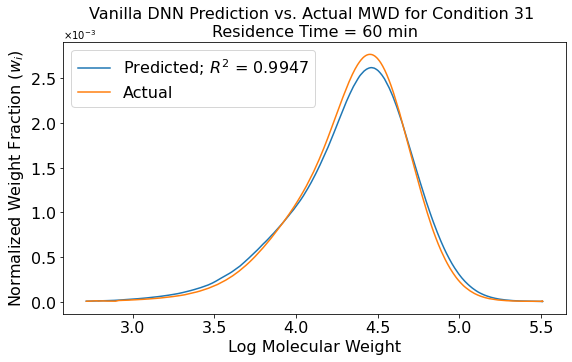

In [60]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t60_pred = y_pred_c31.iloc[1,:]
y_c31t60_expt = batch_c31.iloc[1,:]

r2 = r2_score(y_c31t60_expt, y_c31t60_pred)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 31 \nResidence Time = 60 min', size=16)
plt.plot(x,y_c31t60_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t60_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

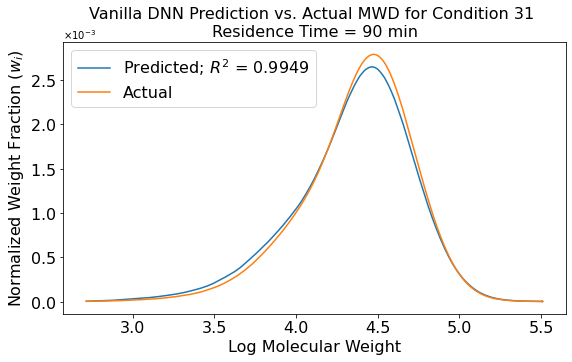

In [61]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t90_pred = y_pred_c31.iloc[2,:]
y_c31t90_expt = batch_c31.iloc[2,:]

r2 = r2_score(y_c31t90_expt, y_c31t90_pred)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 31 \nResidence Time = 90 min', size=16)
plt.plot(x,y_c31t90_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t90_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

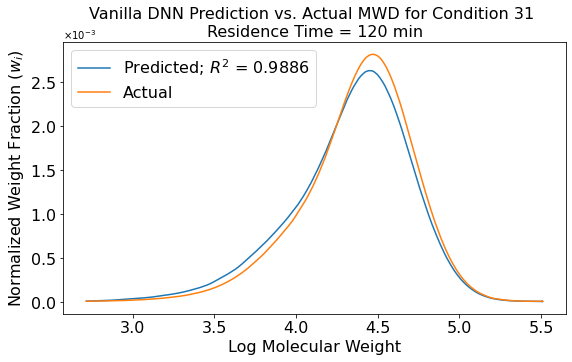

In [62]:
from sklearn.metrics import r2_score

x = batch_c31.columns
y_c31t120_pred = y_pred_c31.iloc[3,:]
y_c31t120_expt = batch_c31.iloc[3,:]

r2 = r2_score(y_c31t120_expt, y_c31t120_pred)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 31 \nResidence Time = 120 min', size=16)
plt.plot(x,y_c31t120_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c31t120_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

### Batch Condition 35 Predicted on Vanilla DNN

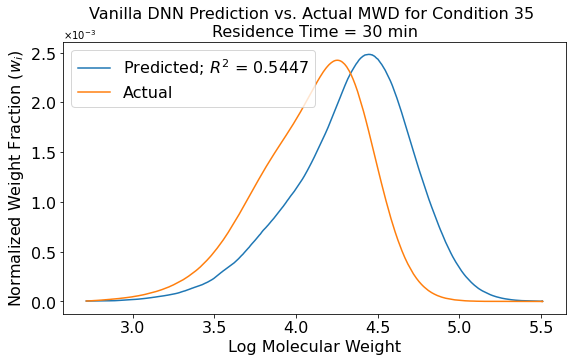

In [63]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t30_pred = y_pred_c35.iloc[0,:]
y_c35t30_expt = batch_c35.iloc[0,:]

r2 = r2_score(y_c35t30_expt, y_c35t30_pred)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 35 \nResidence Time = 30 min', size=16)
plt.plot(x,y_c35t30_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t30_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

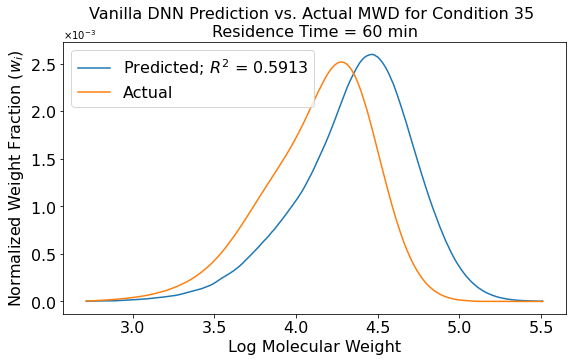

In [64]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t60_pred = y_pred_c35.iloc[1,:]
y_c35t60_expt = batch_c35.iloc[1,:]

r2 = r2_score(y_c35t60_expt, y_c35t60_pred)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 35 \nResidence Time = 60 min', size=16)
plt.plot(x,y_c35t60_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t60_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

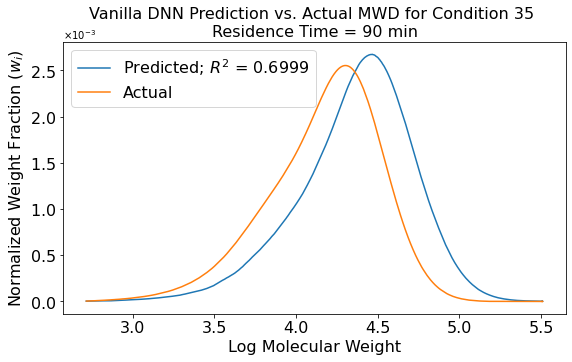

In [65]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t90_pred = y_pred_c35.iloc[2,:]
y_c35t90_expt = batch_c35.iloc[2,:]

r2 = r2_score(y_c35t90_expt, y_c35t90_pred)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 35 \nResidence Time = 90 min', size=16)
plt.plot(x,y_c35t90_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t90_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()

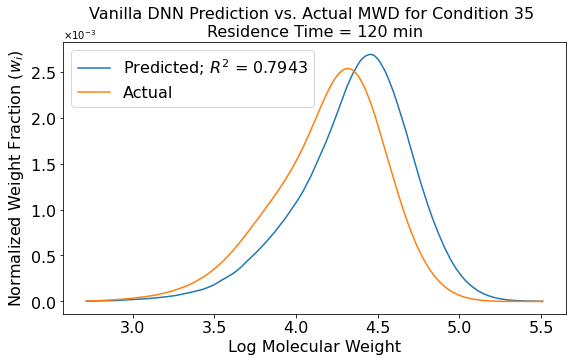

In [66]:
from sklearn.metrics import r2_score

x = batch_c35.columns
y_c35t120_pred = y_pred_c35.iloc[3,:]
y_c35t120_expt = batch_c35.iloc[3,:]

r2 = r2_score(y_c35t120_expt, y_c35t120_pred)

plt.figure(figsize=(9,5))
plt.title('Vanilla DNN Prediction vs. Actual MWD for Condition 35 \nResidence Time = 120 min', size=16)
plt.plot(x,y_c35t120_pred, label='Predicted; $R^{2}$ = ' + str(np.round(r2,4)), linewidth=1.5)
plt.plot(x,y_c35t120_expt, label='Actual', linewidth=1.5)
plt.xlabel('Log Molecular Weight',size=16)
plt.ylabel('Normalized Weight Fraction ($w_{i}$)',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(fontsize=16)
plt.show()